# Race Stats 

Runsingup lacks plots in there data. Median, mean are interesting but my favorite thing to see is a histogram 

The following is data pulled programatically from runsignup.com from the Madison Marathon 2022

URL to get some data https://runsignup.com/Race/Results/26569/?resultSetId=355216&page=1&num=1000&search=#resultSetId-355216;perpage:2000 

Then for example, here is my histogram plot from the data: 


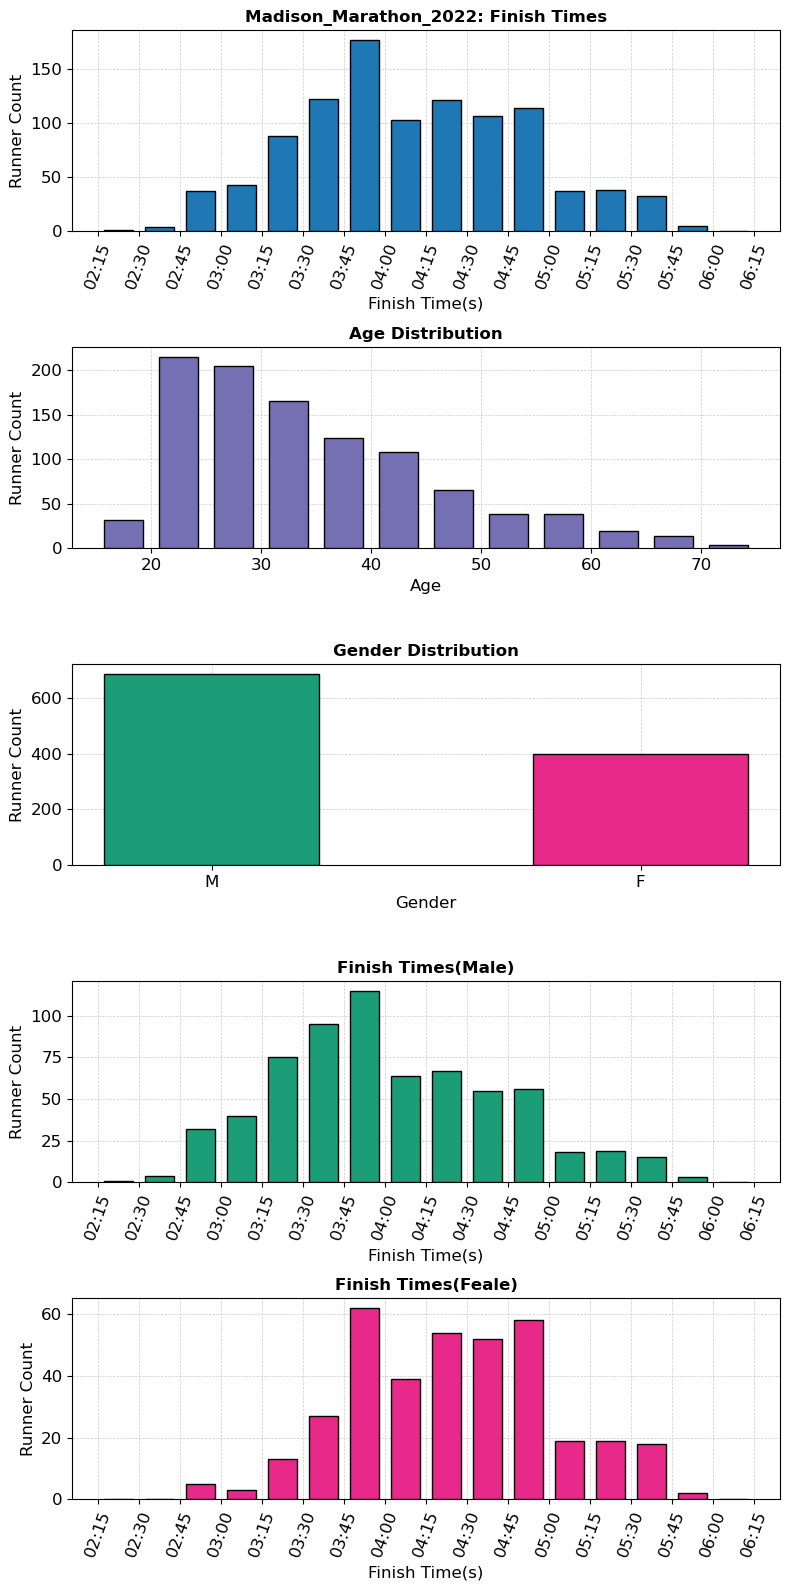

In [839]:
if 'fig_female_finish' in globals(): # run 2nd time through
    figs, axs = plt.subplots(ncols=1, nrows=5)
    plot_finish(figs,axs[0]);
    plot_ages(figs,axs[1]);
    plot_genders(figs,axs[2]);
    plot_finish_m(figs,axs[3]);
    plot_finish_f(figs,axs[4]);
    figs.set_size_inches(8,3.2*5);
    plt.tight_layout()
    if 0:
        plt.savefig('./data/'+ race_name + '.svg')

In [825]:
# Import a bunch of libs 
import requests, json, os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['png']
import numpy as np
import matplotlib as matplotlib
import math
import pandas
from matplotlib import animation, rc
from IPython.display import HTML
from pandas import DataFrame
from numpy import genfromtxt
from IPython.display import display
from datetime import datetime, timedelta

# Set some plot defaults 

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)


In [826]:
# API pull data from runsignup

# uncomment the following to make the request, to be site friendly, this is commented out 
#req_url = 'https://runsignup.com/Race/Results/26569/?resultSetId=355216&page=1&num=2000&search=#resultSetId-355216;perpage:2000' # 2022
#req_url = 'https://runsignup.com/Race/Results/26569/?search&resultSetId=289213&page=1&num=2000&search='; race_name = 'Madison_Full_M_2021' # 2021
# req_url = 'https://runsignup.com/Race/Results/26569/?search&resultSetId=355413&page=1&num=4000&search=';  #2022 H/M
# running_data = requests.get(req_url,headers = {"Accept": "application/json"} )
# running_data_json = json.loads(running_data.text)

race_name = 'Madison_Marathon_2022'

# pull from saved
file1 = open("data/madison_full_m_2022.json", "r+")
running_data_json = json.loads(file1.read())

run_data = np.array(running_data_json['resultSet']['results'])


In [827]:
#create create a backup of the data for no doubt, the API will be broken tomorrow

# data_path = './data'
# if not os.path.exists(data_path): # ensure export folder exists
#     os.makedirs(data_path)
# file_path = data_path + '/running_data.json'
# with open(file_path, 'w') as f:
#     f.write(running_data.text)


In [828]:
# get headers
running_headers = []
for i in range(len(running_data_json['headings'])):
    running_headers.append(running_data_json['headings'][i]['key'])
running_headers;

In [829]:
# parse data 
# convert strings such as '2:24:55.27' to datetime

finish_times = []
finish_times_M = []
finish_times_F = []
race_age = []
for i in range(len(run_data)):
    try:
        finish_times.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
        race_age.append(int(run_data[:,running_headers.index('age')][i]))
        if run_data[:,running_headers.index('gender')][i] == 'F':
            finish_times_F.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
        else:
            finish_times_M.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
    except:
        0

# Get nices half bins
# time_start = datetime.strptime('1:0',"%H:%M")
# time_bins = []
# for i in range(14):
#    time_bins.append(time_start + timedelta(minutes=i*10))

# Get nices bins full
time_start = datetime.strptime('2:15',"%H:%M")
time_bins = []
for i in range(17):
    time_bins.append(time_start + timedelta(minutes=i*15))

# Create bins for ages 
age_bins = []
for i in range(13):
    age_bins.append(15 + i*5)


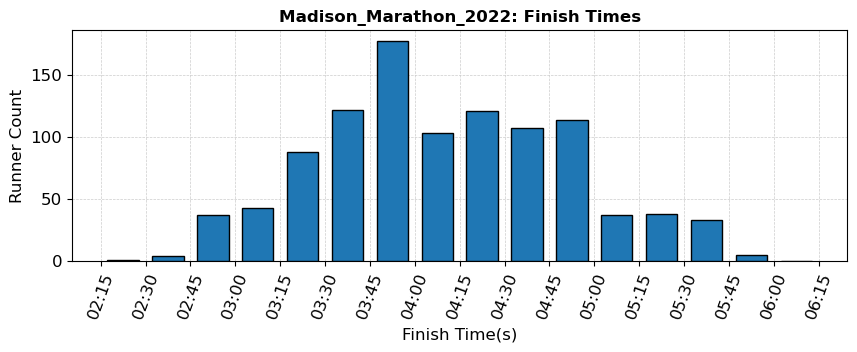

In [830]:
# generate some plots 

fig_1,ax1 = plt.subplots()

def plot_finish(fig,ax):
    ax.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
    ax.hist(finish_times, bins=time_bins, ec="black", color=plt.cm.tab10.colors[0], rwidth=0.7, zorder=3) # times & bins
    xfmt = []
    xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
    ax.xaxis.set_major_formatter(xfmt) # apply label format 
    fig.set_size_inches(10,3); # figure size 
    ax.tick_params(axis='x',labelrotation=70)
    ax.set_xticks(time_bins);
    ax.set_ylabel('Runner Count')
    ax.set_xlabel('Finish Time(s)');
    ax.set_title(race_name + ': '+ 'Finish Times');
plot_finish(fig_1,ax1);

Note, quite a few more interesting plots could be made by sepperating data by the provided headers:

In [831]:
running_headers

['race_placement',
 'bib_num',
 'name',
 'gender',
 'field_274839',
 'age',
 'age_performance_percentage',
 'division_place',
 'division',
 'city',
 'state',
 'split_417802',
 'split_417802_pace',
 'split_417803',
 'split_417803_pace',
 'split_417804',
 'split_417804_pace',
 'split_417805',
 'split_417805_pace',
 'clock_time',
 'chip_time',
 'avg_pace',
 'countrycode',
 'profile_image_url']

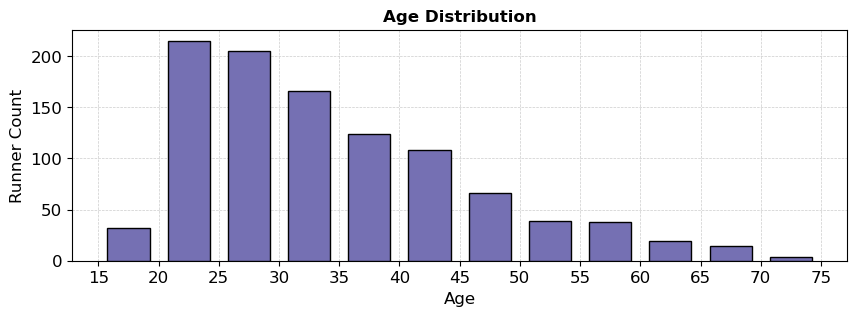

In [832]:

fig_race_age,ax2 = plt.subplots()
def plot_ages(fig,ax):
    n,bins,patches = ax.hist(race_age, ec="black", bins=age_bins, rwidth=0.7,zorder=3, color=plt.cm.Dark2.colors[2]) # times & bins
    plt.xticks(np.array(bins).astype(np.int32));
    ax.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
    fig.set_size_inches(10,3); # figure size 
    ax.set_ylabel('Runner Count')
    ax.set_xlabel('Age');
    ax.set_title('Age Distribution');
plot_ages(fig_race_age,ax2)

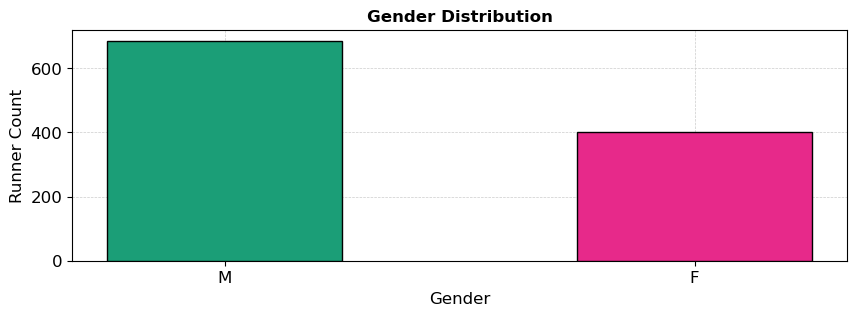

In [833]:
fig_race_gender,ax3 = plt.subplots()
def plot_genders(fig,ax):
    n,bins,patches = ax.hist(run_data[:,running_headers.index('gender')], bins=['M','F',""], rwidth=0.5,ec="black",zorder=3) # times & bins
    ax.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
    fig.set_size_inches(10,3); # figure size 
    patches[0].set_facecolor(plt.cm.Dark2.colors[0])
    patches[1].set_facecolor(plt.cm.Dark2.colors[3])
    ax.set_ylabel('Runner Count')
    ax.set_xlabel('Gender');
    ax.set_xticks([0.5,1.5],['M','F']);
    ax.set_title('Gender Distribution');
plot_genders(fig_race_gender,ax3)

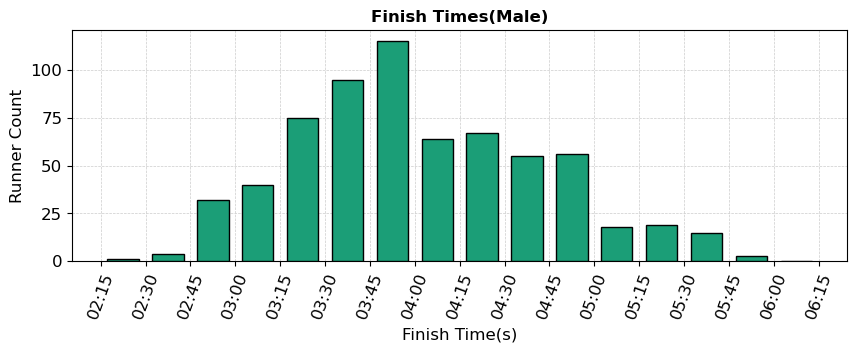

In [834]:
fig_male_finish,ax4 = plt.subplots()

def plot_finish_m(fig, ax):
    ax.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
    ax.hist(finish_times_M, bins=time_bins, ec="black", rwidth=0.7, zorder=3, color=plt.cm.Dark2.colors[0]) # times & bins
    xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
    ax.xaxis.set_major_formatter(xfmt) # apply label format 
    fig.set_size_inches(10,3); # figure size 
    ax.tick_params(axis='x',labelrotation=70)
    ax.set_xticks(time_bins);
    ax.set_ylabel('Runner Count')
    ax.set_xlabel('Finish Time(s)');
    ax.set_title('Finish Times(Male)');
plot_finish_m(fig_male_finish, ax4)

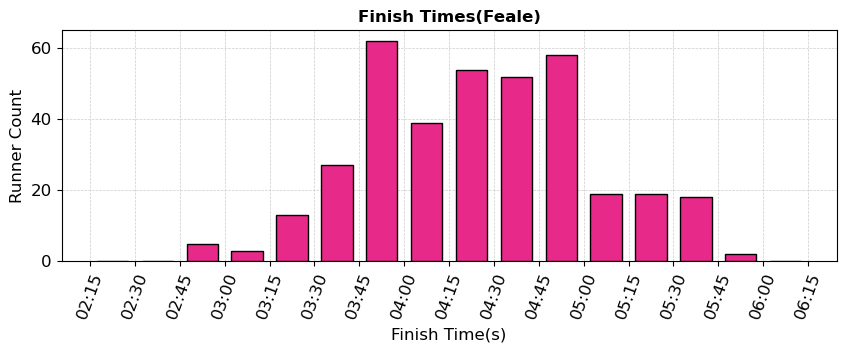

In [835]:
fig_female_finish,ax5 = plt.subplots()

def plot_finish_f(fig,ax):
    ax.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
    ax.hist(finish_times_F, bins=time_bins, ec="black", rwidth=0.7, zorder=3, color=plt.cm.Dark2.colors[3]) # times & bins
    xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
    ax.xaxis.set_major_formatter(xfmt) # apply label format 
    fig.set_size_inches(10,3); # figure size 
    ax.tick_params(axis='x',labelrotation=70)
    ax.set_xticks(time_bins);
    ax.set_ylabel('Runner Count')
    ax.set_xlabel('Finish Time(s)');
    ax.set_title('Finish Times(Feale)');
plot_finish_f(fig_female_finish,ax5)